# Example of shear-wave splitting applied to an icequake from Rutford Ice Stream, Antarctica

In [13]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
import swspy
import obspy
from obspy import UTCDateTime
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [60]:
# Load data:
archive_path = "data/mseed"
archive_vs_file = "archive"
nonlinloc_event_path = "data/loc.Tom__RunNLLoc000.20090121.042009.grid0.loc.hyp"

starttime = UTCDateTime("20090121T042009.18523") - 0.5
endtime = UTCDateTime("20090121T042009.18523") + 2.5
load_wfs_obj = swspy.io.load_waveforms(archive_path, starttime, endtime)
load_wfs_obj.filter = True
load_wfs_obj.filter_freq_min_max = [1.0, 80.0]
st = load_wfs_obj.read_waveform_data()

In [61]:
# Add noise to data:
for i in range(len(st)):
    st[i].data = st[i].data + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1))) + 0.3*np.roll(st[i].data, int(np.random.uniform(-100, 100,1)))

<IPython.core.display.Javascript object>


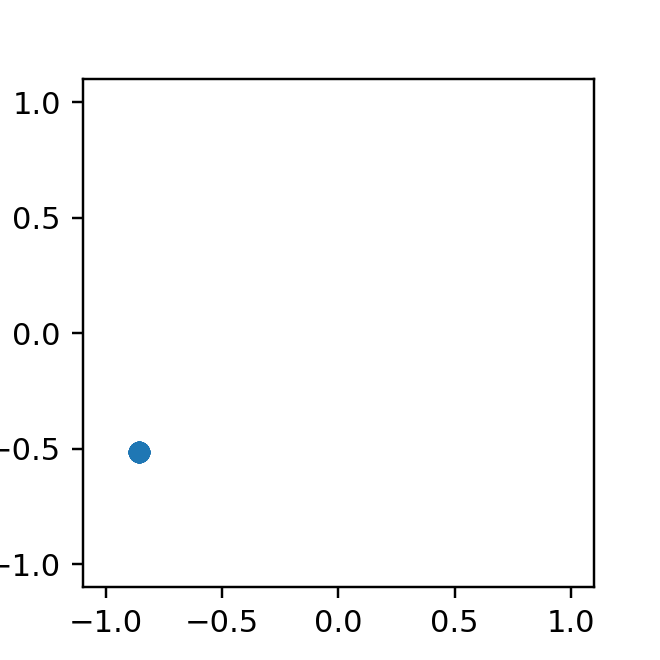

  station    phi  phi_err     dt   dt_err
0    ST01  69.74     1.25  0.047  0.00875


<IPython.core.display.Javascript object>


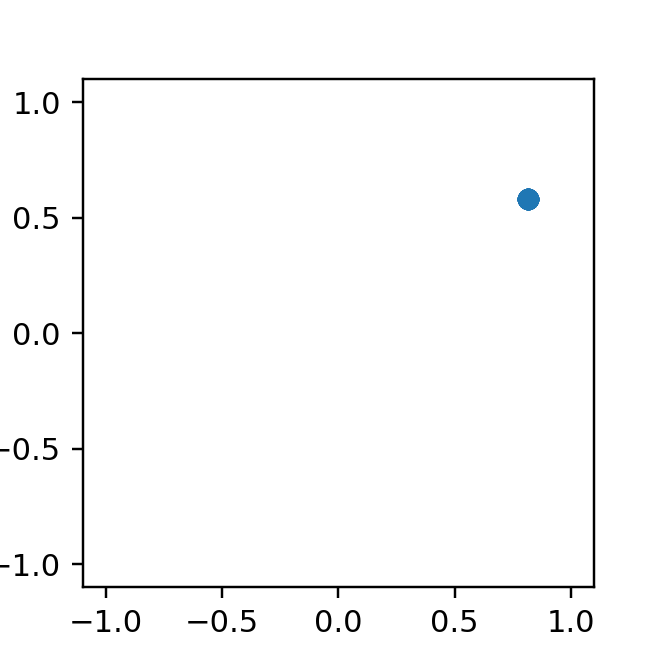

  station    phi  phi_err     dt  dt_err
0    ST02  89.53     22.5  0.041   0.005


<IPython.core.display.Javascript object>


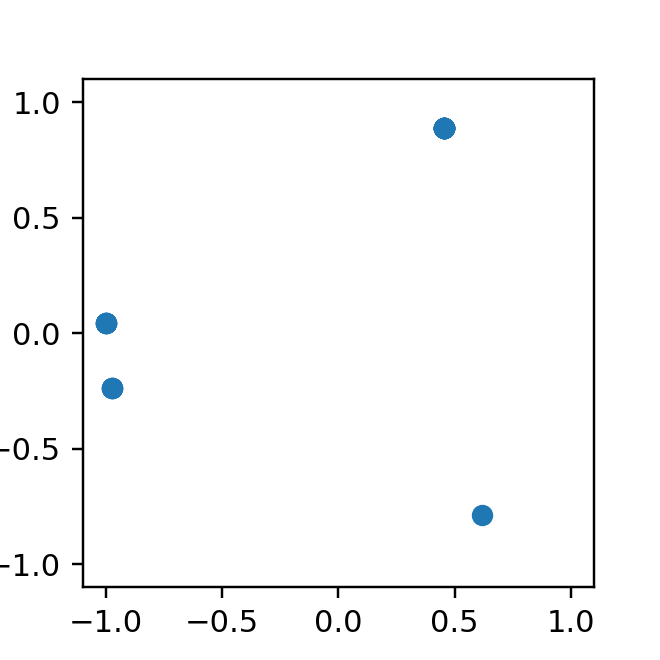

  station     phi  phi_err     dt  dt_err
0    ST03  298.47     1.25  0.031   0.014


<IPython.core.display.Javascript object>


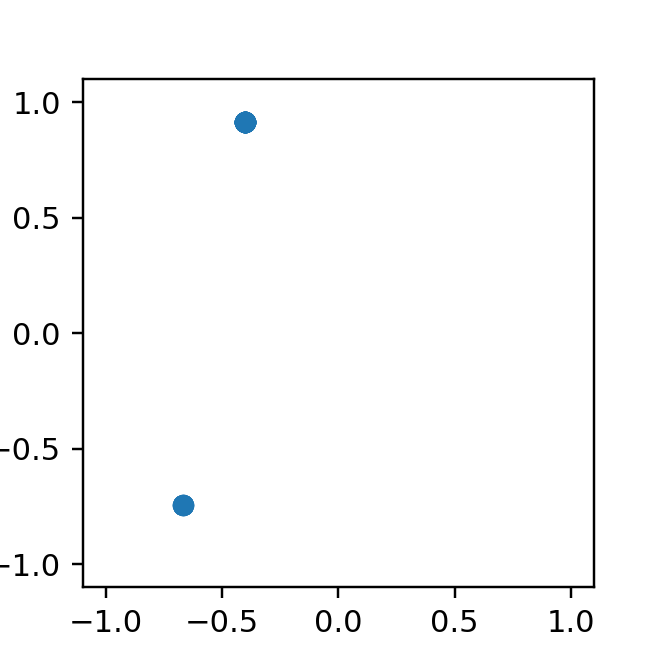

  station     phi  phi_err     dt   dt_err
0    ST04  261.07      1.0  0.045  0.00525


<IPython.core.display.Javascript object>


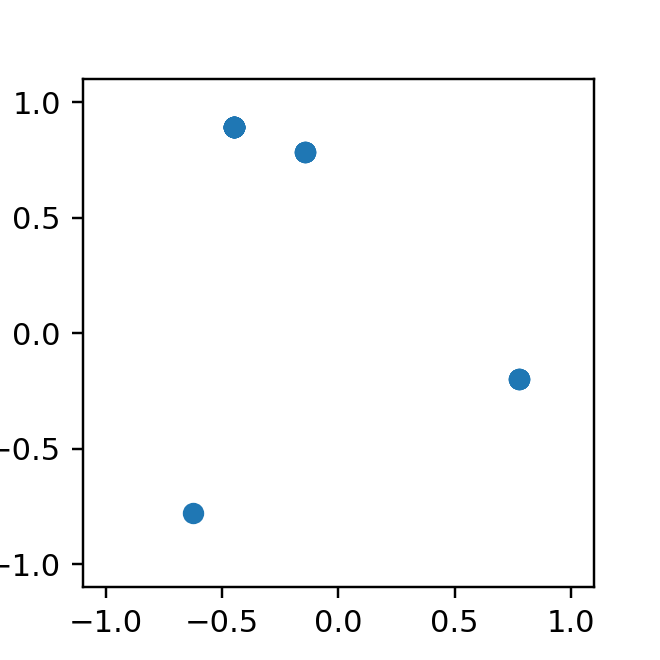

  station    phi  phi_err     dt   dt_err
0    ST05  93.57      6.5  0.005  0.02175
No S phase pick for station: ST06 therefore skipping this station.
No S phase pick for station: ST07 therefore skipping this station.
No S phase pick for station: ST08 therefore skipping this station.
No S phase pick for station: ST09 therefore skipping this station.
No S phase pick for station: ST10 therefore skipping this station.


,station,phi,phi_err,dt,dt_err
0,ST01,69.74,1.25,0.047,0.00875
0,ST02,89.53,22.50,0.041,0.00500
0,ST03,298.47,1.25,0.031,0.01400
0,ST04,261.07,1.00,0.045,0.00525
0,ST05,93.57,6.50,0.005,0.02175


In [66]:
# Calculate splitting:
splitting_event = swspy.splitting.create_splitting_object(st, nonlinloc_event_path) #(st.select(station="ST01"), nonlinloc_event_path)
splitting_event.overall_win_start_pre_fast_S_pick = 0.2 #0.1
splitting_event.overall_win_start_post_fast_S_pick = 0.4 #0.2
splitting_event.rotate_step_deg = 1.0 #2.5
splitting_event.max_t_shift_s = 0.12
splitting_event.n_win = 5 #5 #10
# splitting_event.perform_sp
splitting_event.perform_sws_analysis(coord_system="ZNE")

30 Trace(s) in Stream:

ZZ.ST01..EHE | 2009-01-21T04:20:08.685000Z - 2009-01-21T04:20:11.685000Z | 1000.0 Hz, 3001 samples
...
(28 other traces)
...
ZZ.ST10..EHZ | 2009-01-21T04:20:08.685000Z - 2009-01-21T04:20:11.685000Z | 1000.0 Hz, 3001 samples

[Use "print(Stream.__str__(extended=True))" to print all Traces]

In [ ]:
X.shape

In [ ]:
a = np.arange(6)
b = np.arange(6)
Y = np.dstack((a,b))[0,:,:]
Y.shape